In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
!pip install opendatasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import opendatasets as od


In [7]:
df=pd.read_csv('cars_dataset.csv')
df

,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,two,two,small,low,unacc
1,vhigh,vhigh,two,two,small,med,unacc
2,vhigh,vhigh,two,two,small,high,unacc
3,vhigh,vhigh,two,two,med,low,unacc
4,vhigh,vhigh,two,two,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [8]:
df['car'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

<Axes: >

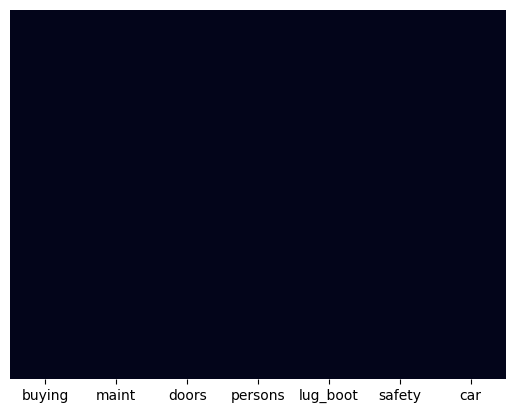

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [11]:
df['doors']=df['doors'].astype('category')
df['doors']=df['doors'].cat.codes
df['maint']=df['maint'].astype('category')
df['maint']=df['maint'].cat.codes
df['buying']=df['buying'].astype('category')
df['buying']=df['buying'].cat.codes
df['persons']=df['persons'].astype('category')
df['persons']=df['persons'].cat.codes
df['lug_boot']=df['lug_boot'].astype('category')
df['lug_boot']=df['lug_boot'].cat.codes
df['safety']=df['safety'].astype('category')
df['safety']=df['safety'].cat.codes

In [12]:
x=df.drop(columns='car')
x

,buying,maint,doors,persons,lug_boot,safety
0,3,3,3,2,2,1
1,3,3,3,2,2,2
2,3,3,3,2,2,0
3,3,3,3,2,1,1
4,3,3,3,2,1,2
...,...,...,...,...,...,...
1723,1,1,0,1,1,2
1724,1,1,0,1,1,0
1725,1,1,0,1,0,1
1726,1,1,0,1,0,2


In [13]:
y=df['car']
y

,car
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21)
x_train

,buying,maint,doors,persons,lug_boot,safety
1345,0,0,2,1,1,2
300,3,0,1,2,1,1
989,1,0,1,0,0,0
1588,3,3,0,1,1,2
1196,0,3,3,1,0,0
...,...,...,...,...,...,...
368,2,3,1,2,0,0
48,0,0,3,2,1,1
772,0,0,2,0,0,2
1231,2,3,3,1,0,2


In [15]:
x_test

,buying,maint,doors,persons,lug_boot,safety
1066,0,2,0,0,1,2
1172,3,2,3,1,2,0
213,0,1,2,2,0,1
23,3,2,3,2,1,0
826,2,1,2,0,0,2
...,...,...,...,...,...,...
438,3,3,0,2,0,1
1070,0,2,0,0,0,0
164,3,2,2,2,2,0
1127,1,0,0,0,2,0


In [16]:
y_train

,car
1345,acc
300,unacc
989,vgood
1588,unacc
1196,unacc
...,...
368,unacc
48,unacc
772,acc
1231,acc


In [17]:
y_test

,car
1066,acc
1172,unacc
213,unacc
23,unacc
826,good
...,...
438,unacc
1070,acc
164,unacc
1127,acc


In [18]:
from sklearn.svm import SVC
model=SVC(C=7,kernel='poly')
model.fit(x_train,y_train)

SVC(C=7, kernel='poly')

In [19]:
model.score(x_train,y_train)

0.9230769230769231

In [20]:
model.score(x_test,y_test)

0.8709055876685935

In [21]:
from sklearn.metrics import classification_report,accuracy_score
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.68      0.78      0.73       109
        good       0.93      0.64      0.76        22
       unacc       0.96      0.91      0.93       370
       vgood       0.61      0.94      0.74        18

    accuracy                           0.87       519
   macro avg       0.79      0.82      0.79       519
weighted avg       0.89      0.87      0.87       519



In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 85,   1,  15,   8],
       [  6,  14,   0,   2],
       [ 33,   0, 336,   1],
       [  1,   0,   0,  17]])

Text(33.22222222222222, 0.5, 'Truth')

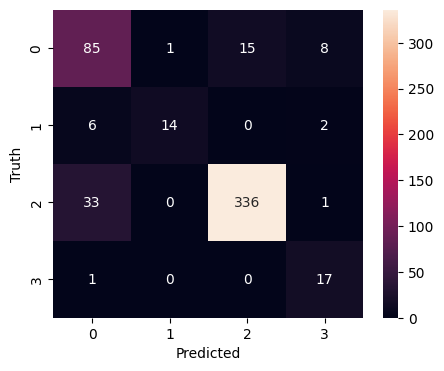

In [23]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt="")
plt.xlabel('Predicted')
plt.ylabel('Truth')
